## Env Creative

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm
import matplotlib.pyplot as plt
import imageio.v2

## Function to add Gaussian noise to the image

In [2]:
def add_noise(img, noise_level):
    noise = np.random.normal(0, noise_level, img.shape)
    noisy_img = img + noise
    return np.clip(noisy_img, 0, 1)

## Define the DIP model (Assuming a simple CNN architecture)

In [3]:
class DIPModel(nn.Module):
    def __init__(self):
        super(DIPModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=3, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.conv3(x)
        return x

## Define Show Image Function

## Load target image

In [4]:
img_path = '/kaggle/input/lenna-test-image/Lenna_(test_image).png'
target_img = imageio.imread(img_path)

if target_img.dtype == np.uint8:
    target_img = target_img / 255.0

/tmp/ipykernel_24/1330099834.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  target_img = imageio.imread(img_path)


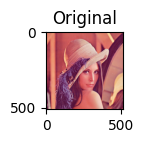

In [5]:
plt.figure(figsize=(3, 1))
plt.title("Original")
plt.imshow(np.clip(target_img, 0, 1))
plt.show()

## Define noise levels and stages

In [6]:
noise_level = 0.1
noisy_img = add_noise(target_img, noise_level)

## Prepare for Training

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
noisy_img_torch = torch.tensor(noisy_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
target_img_torch = torch.tensor(target_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

In [9]:
model = DIPModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

## Training

In [10]:
num_epochs = 3000
patience = 50
best_psnr = 0
best_model = None
psnr_history = []

no_improvement_count = 0  # Initialize the no improvement counter

  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 0, PSNR: 5.4889, SSIM: 0.0374
Epoch [0/3000], Loss: 0.2960, PSNR: 5.4889, SSIM: 0.0374


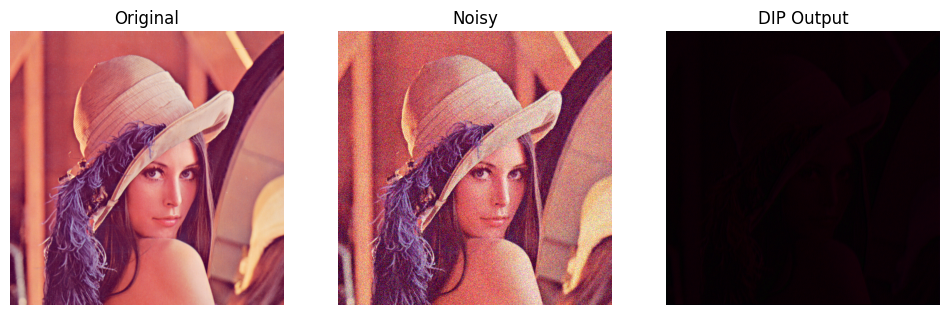

  4%|▍         | 127/3000 [00:04<01:06, 43.07it/s]

Epoch: 100, PSNR: 28.7219, SSIM: 0.7557


  8%|▊         | 227/3000 [00:07<01:04, 43.01it/s]

Epoch: 200, PSNR: 29.7380, SSIM: 0.7670


 11%|█         | 327/3000 [00:09<01:02, 43.04it/s]

Epoch: 300, PSNR: 30.4563, SSIM: 0.7771


 14%|█▍        | 427/3000 [00:12<01:00, 42.45it/s]

Epoch: 400, PSNR: 30.6805, SSIM: 0.7844


 18%|█▊        | 527/3000 [00:15<00:57, 42.93it/s]

Epoch: 500, PSNR: 30.7458, SSIM: 0.7888


 21%|██        | 627/3000 [00:17<00:55, 42.54it/s]

Epoch: 600, PSNR: 30.8851, SSIM: 0.7918


 24%|██▍       | 727/3000 [00:20<00:53, 42.60it/s]

Epoch: 700, PSNR: 30.5607, SSIM: 0.7939


 28%|██▊       | 827/3000 [00:22<00:50, 42.70it/s]

Epoch: 800, PSNR: 31.0251, SSIM: 0.7964


 31%|███       | 927/3000 [00:25<00:49, 42.28it/s]

Epoch: 900, PSNR: 30.9325, SSIM: 0.7978


 33%|███▎      | 998/3000 [00:27<00:50, 39.50it/s]

Epoch: 1000, PSNR: 30.3732, SSIM: 0.7991
Epoch [1000/3000], Loss: 0.0009, PSNR: 30.3732, SSIM: 0.7991


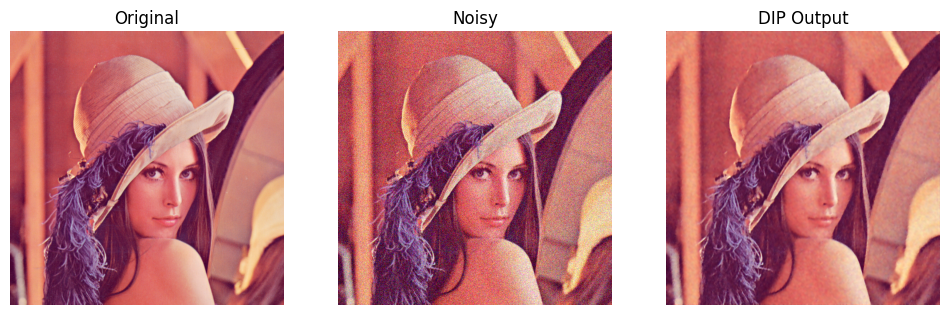

 38%|███▊      | 1127/3000 [00:31<00:43, 42.85it/s]

Epoch: 1100, PSNR: 29.5201, SSIM: 0.8000


 41%|████      | 1227/3000 [00:34<00:41, 42.34it/s]

Epoch: 1200, PSNR: 31.0591, SSIM: 0.8017


 44%|████▍     | 1327/3000 [00:36<00:39, 42.63it/s]

Epoch: 1300, PSNR: 30.7468, SSIM: 0.8026


 48%|████▊     | 1427/3000 [00:39<00:36, 42.63it/s]

Epoch: 1400, PSNR: 31.2548, SSIM: 0.8036


 51%|█████     | 1527/3000 [00:42<00:34, 42.45it/s]

Epoch: 1500, PSNR: 30.1174, SSIM: 0.8042


 54%|█████▍    | 1627/3000 [00:44<00:32, 41.78it/s]

Epoch: 1600, PSNR: 31.2182, SSIM: 0.8050


 58%|█████▊    | 1727/3000 [00:47<00:30, 42.22it/s]

Epoch: 1700, PSNR: 30.7771, SSIM: 0.8056


 61%|██████    | 1827/3000 [00:50<00:28, 41.88it/s]

Epoch: 1800, PSNR: 30.9437, SSIM: 0.8063


 64%|██████▍   | 1927/3000 [00:52<00:25, 42.11it/s]

Epoch: 1900, PSNR: 31.0730, SSIM: 0.8068


 67%|██████▋   | 1998/3000 [00:54<00:26, 38.31it/s]

Epoch: 2000, PSNR: 30.6217, SSIM: 0.8070
Epoch [2000/3000], Loss: 0.0009, PSNR: 30.6217, SSIM: 0.8070


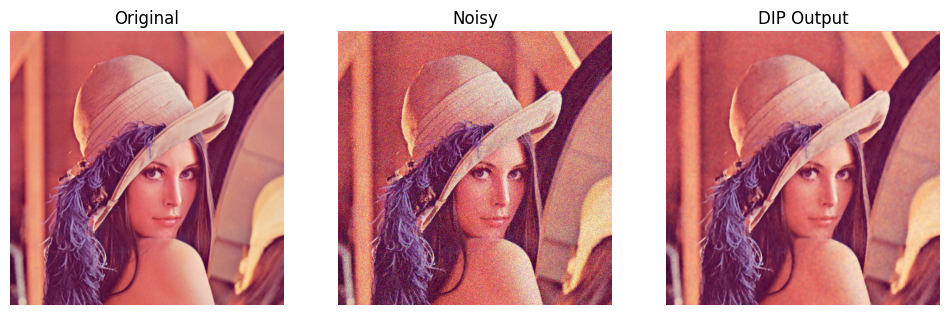

 71%|███████   | 2127/3000 [00:59<00:20, 41.95it/s]

Epoch: 2100, PSNR: 31.2522, SSIM: 0.8079


 74%|███████▍  | 2227/3000 [01:01<00:18, 41.91it/s]

Epoch: 2200, PSNR: 30.1372, SSIM: 0.8080


 78%|███████▊  | 2327/3000 [01:04<00:16, 41.61it/s]

Epoch: 2300, PSNR: 30.9768, SSIM: 0.8087


 81%|████████  | 2427/3000 [01:07<00:13, 41.06it/s]

Epoch: 2400, PSNR: 31.4588, SSIM: 0.8094


 84%|████████▍ | 2527/3000 [01:09<00:11, 41.42it/s]

Epoch: 2500, PSNR: 31.4697, SSIM: 0.8097


 88%|████████▊ | 2627/3000 [01:12<00:09, 40.89it/s]

Epoch: 2600, PSNR: 30.6923, SSIM: 0.8097


 91%|█████████ | 2727/3000 [01:15<00:06, 41.04it/s]

Epoch: 2700, PSNR: 31.4383, SSIM: 0.8105


 94%|█████████▍| 2827/3000 [01:18<00:04, 41.11it/s]

Epoch: 2800, PSNR: 31.1836, SSIM: 0.8102


 98%|█████████▊| 2927/3000 [01:21<00:01, 41.24it/s]

Epoch: 2900, PSNR: 31.5203, SSIM: 0.8111


100%|█████████▉| 2999/3000 [01:22<00:00, 37.09it/s]

Epoch: 2999, PSNR: 31.2456, SSIM: 0.8116
Epoch [2999/3000], Loss: 0.0008, PSNR: 31.2456, SSIM: 0.8116


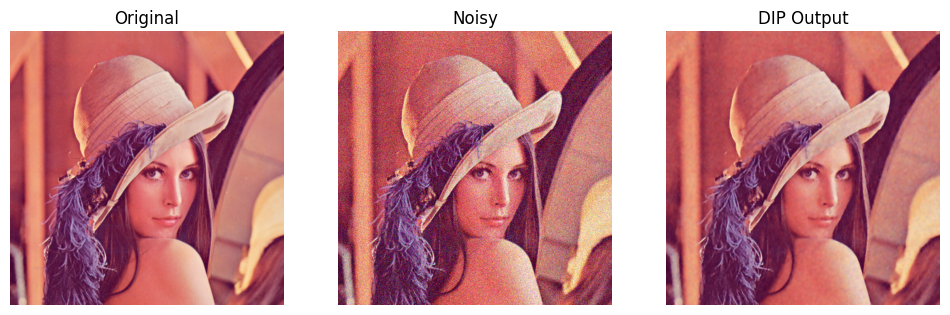

100%|██████████| 3000/3000 [01:24<00:00, 35.61it/s]


In [11]:
for epoch in tqdm(range(num_epochs)):
    model.train()
    optimizer.zero_grad()
    output = model(noisy_img_torch)
    loss = criterion(output, target_img_torch)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 or epoch == num_epochs - 1:
        model.eval()
        with torch.no_grad():
            output_img = output.squeeze().cpu().numpy().transpose(1, 2, 0)
            output_img = np.clip(output_img, 0, 1)
            current_psnr = psnr(target_img, output_img, data_range=1.0)
            current_ssim = ssim(target_img, output_img, data_range=1.0, channel_axis=-1)
            psnr_history.append(current_psnr)
            print(f"Epoch: {epoch}, PSNR: {current_psnr:.4f}, SSIM: {current_ssim:.4f}")

            # Check for early stopping
            if current_psnr > best_psnr:
                best_psnr = current_psnr
                best_model = model.state_dict()
                no_improvement_count = 0  # Reset counter if improvement
            else:
                no_improvement_count += 1

            if no_improvement_count >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
                        # Plot and save the current output image
            if epoch % 1000 == 0 or epoch == num_epochs - 1:
                print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}, PSNR: {current_psnr:.4f}, SSIM: {current_ssim:.4f}')
                plt.figure(figsize=(12, 6))
                plt.subplot(1, 3, 1)
                plt.title("Original")
                plt.imshow(np.clip(target_img, 0, 1))  
                plt.axis('off')
                plt.subplot(1, 3, 2)
                plt.title("Noisy")
                plt.imshow(np.clip(noisy_img, 0, 1)) 
                plt.axis('off')
                plt.subplot(1, 3, 3)
                plt.title("DIP Output")
                plt.imshow(output_img)
                plt.axis('off')
                plt.show()

In [12]:
model.load_state_dict(best_model)

<All keys matched successfully>

## Evaluation

In [13]:
model.eval()
with torch.no_grad():
    final_output = model(noisy_img_torch).squeeze().cpu().numpy().transpose(1, 2, 0)
    final_output = np.clip(final_output, 0, 1)
    final_psnr = psnr(target_img, final_output, data_range=1.0)
    final_ssim = ssim(target_img, final_output, data_range=1.0, channel_axis=-1)
    print(f"Final PSNR: {final_psnr:.4f}, Final SSIM: {final_ssim:.4f}")

Final PSNR: 31.3714, Final SSIM: 0.8115


## Visulize the result

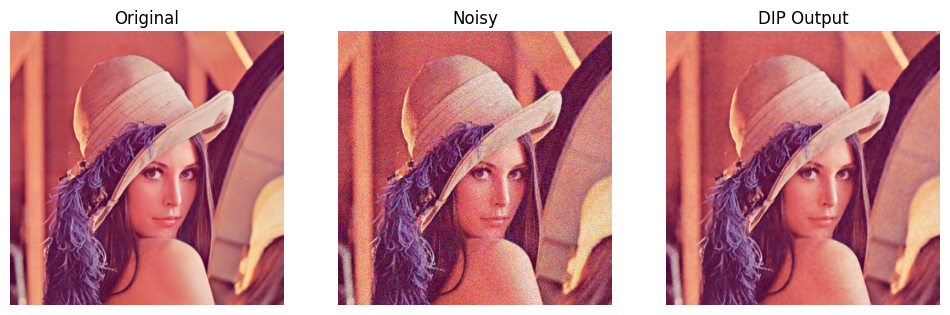

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(np.clip(target_img, 0, 1))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Noisy")
plt.imshow(np.clip(noisy_img, 0, 1))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("DIP Output")
plt.imshow(final_output)
plt.axis('off')
plt.show()